# Real Estate Data Project

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import shutil

pd.set_option('display.max_columns', None) 
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Download data
path = kagglehub.dataset_download("ahmedshahriarsakib/usa-real-estate-dataset")
print("Path to dataset files:", path)

# Copy to data folder
dest_folder = "./data"
os.makedirs(dest_folder, exist_ok=True)

for file in os.listdir(path):
    shutil.copy(os.path.join(path, file), dest_folder)
    
print(f"Files copied to {dest_folder}")

Path to dataset files: C:\Users\jacqu\.cache\kagglehub\datasets\ahmedshahriarsakib\usa-real-estate-dataset\versions\25
Files copied to ./data


In [3]:
# Load data
data_original = pd.read_csv("Data/realtor-data.zip.csv")
print(data_original.shape)

(2226382, 12)


In [4]:
data_original.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [6]:
# filter for sold & relevant columns
data = data_original[data_original['status'] == 'sold']
data = data[['brokered_by','price','bed','bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size']]

# drop nulls
data = data.dropna()
print(data.shape)

(608194, 9)


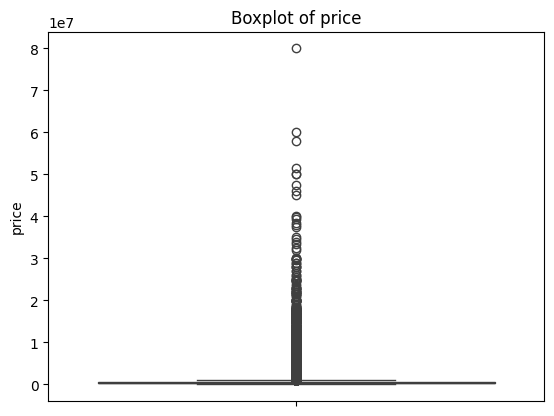

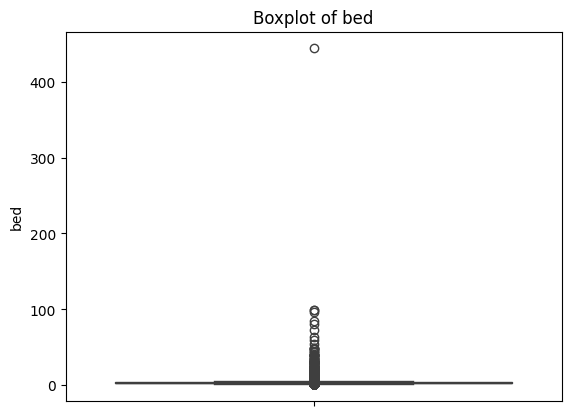

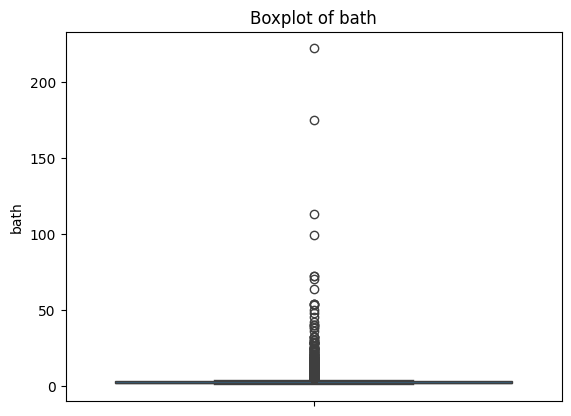

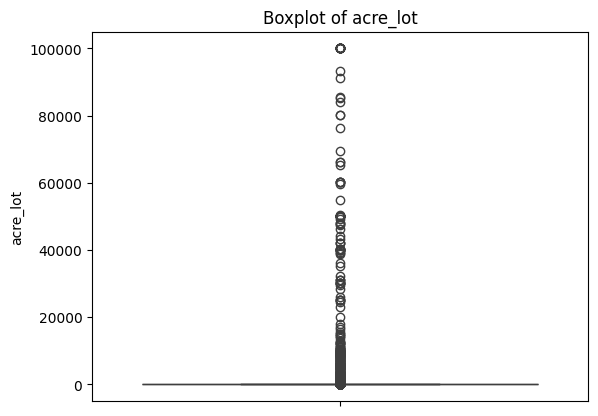

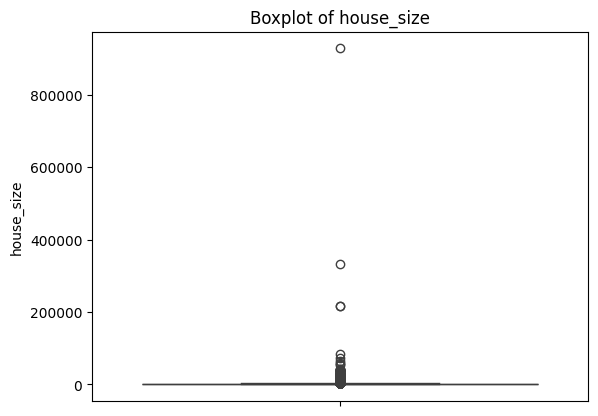

In [8]:
# check distrubutions
for feature in ['price', 'bed', 'bath', 'acre_lot', 'house_size']:
    plt.figure()
    sns.boxplot(data=data, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()
    

In [169]:
# remove outliers 
columns_to_check = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

df_clean = data.copy()

for col in columns_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Original rows: {len(data)}")
print(f"After outliers: {len(df_clean)}")

Original rows: 608194
After outliers: 521246


In [39]:
df_clean.describe()

,brokered_by,price,bed,bath,acre_lot,zip_code,house_size
count,"521,246.00","521,246.00","521,246.00","521,246.00","521,246.00","521,246.00","521,246.00"
mean,"53,612.19","425,257.80",3.24,2.34,0.24,"57,476.39","1,837.00"
std,"30,343.84","283,354.76",0.88,0.88,0.20,"30,503.96",742.60
min,0.00,1.00,1.00,1.00,0.00,602.00,100.00
25%,"24,538.00","229,900.00",3.00,2.00,0.13,"30,143.00","1,300.00"
50%,"53,016.00","350,000.00",3.00,2.00,0.18,"60,625.00","1,688.00"
75%,"79,202.00","545,000.00",4.00,3.00,0.27,"85,716.00","2,215.00"
max,"110,138.00","1,645,000.00",7.00,6.00,1.04,"99,403.00","5,005.00"


## Crime Data

In [67]:
crime_df_original = pd.read_csv("Data\\39062-0001-Data.tsv", sep='\t')
print(crime_df_original.shape)

C:\Users\jacqu\AppData\Local\Temp\ipykernel_17268\2616205078.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df_original = pd.read_csv("Data\\39062-0001-Data.tsv", sep='\t')


(988966, 89)


In [166]:
crime_df_original.head(3)

,ASR_ID,CONTENTS,STATE,ORI,GROUP,DIV,AGHEADER,YEAR,MSA,COUNTY,SEQNO,SUB,CORE,COVBY,POP,AGENCY,STNAME,MONTH,MOHEADER,BREAK,AREO,ZERO,DTLASTUP,DTPRUP1,DTPRUP2,JUVDISP,JDHANDDP,JDREFJC,JDREFWA,JDREFOPA,JDREFCC,OFFENSE,OCCUR,M0_9,M10_12,M13_14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25_29,M30_34,M35_39,M40_44,M45_49,M50_54,M55_59,M60_64,M65,F0_9,F10_12,F13_14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25_29,F30_34,F35_39,F40_44,F45_49,F50_54,F55_59,F60_64,F65,AW,AB,AI,AA,JW,JB,JI,JA,AH,AN,JH,JN,ori_size
0,3,3,50,AK00101,1C,9,0,2022,38,0,0,0,Y,,285821,ANCHORAGE,Alaska,1,0,C,1,0,0,0,0,4,0,50,0,0,0,11,3,99999,99999,99999,99999,99999,99999,99999,99999,99999,1,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,1,99999,99999,99999,99999,99999,99999,99999,99999,1,99999,99999,988966
1,3,3,50,AK00101,1C,9,0,2022,38,0,0,0,Y,,285821,ANCHORAGE,Alaska,1,0,C,1,0,0,0,0,4,0,50,0,0,0,18,27,99999,99999,99999,99999,2,1,99999,99999,99999,99999,99999,1,99999,2,3,6,2,1,1,1,99999,99999,99999,99999,1,1,99999,2,99999,99999,99999,1,99999,99999,99999,1,1,99999,2,99999,99999,2,99999,99999,11,2,7,4,3,99999,3,1,99999,24,99999,7,988966
2,3,3,50,AK00101,1C,9,0,2022,38,0,0,0,Y,,285821,ANCHORAGE,Alaska,1,0,C,1,0,0,0,0,4,0,50,0,0,0,20,6,99999,99999,99999,1,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,1,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,1,99999,99999,1,99999,99999,99999,1,99999,1,988966


In [167]:
# relevant columns
crime_df = crime_df_original[['AGENCY', 'ORI', 'STATE', 'STNAME', 'COUNTY', 'YEAR', 'OFFENSE', 'OCCUR', 'POP']]
crime_df

,AGENCY,ORI,STATE,STNAME,COUNTY,YEAR,OFFENSE,OCCUR,POP
0,ANCHORAGE,AK00101,50,Alaska,0,2022,11,3,285821
1,ANCHORAGE,AK00101,50,Alaska,0,2022,18,27,285821
2,ANCHORAGE,AK00101,50,Alaska,0,2022,20,6,285821
3,ANCHORAGE,AK00101,50,Alaska,0,2022,30,9,285821
4,ANCHORAGE,AK00101,50,Alaska,0,2022,40,42,285821
...,...,...,...,...,...,...,...,...,...
988961,WIND RIVER AGENCY,WYDI050,49,Wyomin,0,2022,200,3,0
988962,WIND RIVER AGENCY,WYDI050,49,Wyomin,0,2022,210,11,0
988963,WIND RIVER AGENCY,WYDI050,49,Wyomin,0,2022,240,16,0
988964,WIND RIVER AGENCY,WYDI050,49,Wyomin,0,2022,250,3,0


In [168]:
for col in crime_df.columns:
    print(col, crime_df[col].nunique())

AGENCY 11276
ORI 15763
STATE 53
STNAME 51
COUNTY 253
YEAR 1
OFFENSE 49
OCCUR 55
POP 9831


## Agency Data

In [129]:
# Agency info
agency_df = pd.read_csv("Data\\35158-0001-Data.tsv", sep='\t')
print(agency_df.shape)

(36490, 46)


In [139]:
agency_df = agency_df[["NAME", "ORI7", "STATENAME", "COUNTYNAME", "ADDRESS_STATE", "ADDRESS_CITY", "ADDRESS_ZIP", "LG_POPULATION"]]
agency_df.rename(columns={"ORI7": 'ORI'}, inplace=True)
agency_df

,NAME,ORI,STATENAME,COUNTYNAME,ADDRESS_STATE,ADDRESS_CITY,ADDRESS_ZIP,LG_POPULATION
0,AUTAUGAVILLE POLICE DEPARTMENT,AL00402,ALABAMA,AUTAUGA,AL,AUTAUGAVILLE,36003,870
1,PRATTVILLE POLICE DEPARTMENT,AL00401,ALABAMA,AUTAUGA,AL,PRATTVILLE,36067,33960
2,PRATTVILLE FIRE DEPT ARSON INVESTIGATION BRANCH,-1,ALABAMA,AUTAUGA,AL,PRATTVILLE,,888888888
3,AUTAUGA COUNTY SHERIFF'S OFFICE,AL00400,ALABAMA,AUTAUGA,AL,PRATTVILLE,36067,54571
4,FAULKNER STATE COMMUNITY COLLEGE POLICE DEPT,AL00511,ALABAMA,BALDWIN,AL,BAY MINETTE,36507,888888888
...,...,...,...,...,...,...,...,...
36485,WASHAKIE COUNTY SHERIFF'S OFFICE,WY02200,WYOMING,WASHAKIE,WY,WORLAND,82401,8533
36486,NEWCASTLE POLICE DEPT,WY02301,WYOMING,WESTON,WY,NEWCASTLE,82701,3532
36487,SHP DIV L NEWCASTLE,-1,WYOMING,WESTON,WY,NEWCASTLE,,888888888
36488,UPTON POLICE DEPARTMENT,WY02302,WYOMING,WESTON,WY,UPTON,82730,1100


In [165]:
# Merge agency and crime data 
crime_with_location = crime_df.merge(agency_df, on='ORI', how='left')


# Aggregate crime by zipcode
crime_by_zip = crime_with_location.groupby('ADDRESS_ZIP').agg({
    'OCCUR': 'sum',          
    'POP': 'first',           
    'LG_POPULATION': 'first',
    'AGENCY': 'first',
    'STNAME': 'first',
    'STATENAME': 'first',
    'ADDRESS_CITY': 'first',  
    'COUNTYNAME': 'first',    
    'ORI': 'first',
    'YEAR': 'first'}).reset_index()

crime_by_zip['crime_rate'] = (crime_by_zip['OCCUR'] / crime_by_zip['POP']) * 100000

crime_by_zip.sort_values(by='OCCUR', ascending=False)

,ADDRESS_ZIP,OCCUR,POP,LG_POPULATION,AGENCY,STNAME,STATENAME,ADDRESS_CITY,COUNTYNAME,ORI,YEAR,crime_rate
1895,17101,671941,0,"888,888,888.00",BF: ADAMS COUNTY,Pennsy,PENNSYLVANIA,HARRISBURG,ADAMS,PA001BF,2022,inf
9923,94607,574630,428374,"390,724.00",OAKLAND,Califo,CALIFORNIA,OAKLAND,ALAMEDA,CA00109,2022,"134,142.13"
1903,17120,492276,0,"888,888,888.00",OFFICE OF ATTORNEY GENER,Pennsy,PENNSYLVANIA,HARRISBURG,ADAMS,PA001DE,2022,inf
3096,29221,483113,0,"888,888,888.00",FC: ABBEVILLE COUNTY,South,SOUTH CAROLINA,COLUMBIA,ABBEVILLE,SC001FC,2022,inf
3043,29016,316746,0,"888,888,888.00",STP: ABBEVILLE COUNTY,South,SOUTH CAROLINA,BLYTHEWOOD,ABBEVILLE,SC00126,2022,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
3338,30274,3,14771,"15,134.00",RIVERDALE,Georgi,GEORGIA,RIVERDALE,CLAYTON,GA03105,2022,20.31
2788,27521,3,2219,"2,112.00",COATS,North,NORTH CAROLINA,COATS,HARNETT,NC04303,2022,135.20
7269,64862,3,1374,"1,330.00",SARCOXIE,Missou,MISSOURI,SARCOXIE,JASPER,MO04905,2022,218.34
1525,14423,3,2068,"2,201.00",CALEDONIA VILLAGE,New Yo,NEW YORK,CALEDONIA,LIVINGSTON,NY02521,2022,145.07


In [192]:
# fix zipcodes
df_clean['zip_code'] = df_clean['zip_code'].fillna(0).astype(int).astype(str).str.zfill(5)


In [194]:
# Merge real etstate with crime data 
final_df = df_clean.merge(crime_by_zip, left_on='zip_code', right_on='ADDRESS_ZIP',how='left')

final_df
print(f"Final shape: {final_df.shape}")
print(f"Rows with crime data: {final_df['crime_rate'].notna().sum()}")

Final dataset shape: (521246, 21)
Rows with crime data: 222535


In [198]:
final_df[final_df['crime_rate'].notna()]

,brokered_by,price,bed,bath,acre_lot,city,state,zip_code,house_size,ADDRESS_ZIP,OCCUR,POP,LG_POPULATION,AGENCY,STNAME,STATENAME,ADDRESS_CITY,COUNTYNAME,ORI,YEAR,crime_rate
196,"48,733.00","649,900.00",4.00,3.00,0.48,Amherst,Massachusetts,01002,"2,650.00",01002,"19,600.00","39,267.00","37,819.00",AMHERST,Massac,MASSACHUSETTS,AMHERST,HAMPSHIRE,MA00801,"2,022.00","49,914.69"
198,"30,212.00","269,900.00",2.00,1.00,0.46,South Hadley,Massachusetts,01075,"1,312.00",01075,"23,238.00","17,900.00","17,514.00",SOUTH HADLEY,Massac,MASSACHUSETTS,SOUTH HADLEY,HAMPSHIRE,MA00815,"2,022.00","129,821.23"
203,"17,792.00","399,900.00",3.00,3.00,0.35,Easthampton,Massachusetts,01027,"1,380.00",01027,329.00,"15,914.00","16,053.00",EASTHAMPTON,Massac,MASSACHUSETTS,EASTHAMPTON,HAMPSHIRE,MA00805,"2,022.00","2,067.36"
204,"8,147.00","359,000.00",3.00,2.00,1.03,Westfield,Massachusetts,01085,"1,670.00",01085,"3,429.00","40,691.00","41,094.00",WESTFIELD,Massac,MASSACHUSETTS,WESTFIELD,HAMPDEN,MA00722,"2,022.00","8,426.92"
205,"17,792.00","198,000.00",2.00,1.00,0.14,Holyoke,Massachusetts,01040,768.00,01040,"12,992.00","37,945.00","39,880.00",HOLYOKE,Massac,MASSACHUSETTS,HOLYOKE,HAMPDEN,MA00710,"2,022.00","34,239.03"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521222,"108,069.00","367,000.00",3.00,2.00,0.11,College Place,Washington,99324,"1,242.00",99324,"1,416.00","9,907.00","8,765.00",COLLEGE PLACE,Washin,WASHINGTON,COLLEGE PLACE,WALLA WALLA,WA03602,"2,022.00","14,292.92"
521223,"51,838.00","445,000.00",3.00,2.00,0.48,Walla Walla,Washington,99362,"1,450.00",99362,"1,381.00","19,198.00","58,781.00",WALLA WALLA,Washin,WASHINGTON,WALLA WALLA,WALLA WALLA,WA03600,"2,022.00","7,193.46"
521224,"108,356.00","439,000.00",3.00,2.00,0.21,Walla Walla,Washington,99362,"2,328.00",99362,"1,381.00","19,198.00","58,781.00",WALLA WALLA,Washin,WASHINGTON,WALLA WALLA,WALLA WALLA,WA03600,"2,022.00","7,193.46"
521225,"23,062.00","245,000.00",2.00,1.00,0.17,Walla Walla,Washington,99362,832.00,99362,"1,381.00","19,198.00","58,781.00",WALLA WALLA,Washin,WASHINGTON,WALLA WALLA,WALLA WALLA,WA03600,"2,022.00","7,193.46"
